# Coronavirus Analysis Project

# Project Plan

## The Data

In this project, we used 2 source of datasets about COVID-19 situation: 

* **WHO COVID-19 global data**

  Dataset link: [WHO Coronavirus (COVID-19) Dashboard | WHO Coronavirus (COVID-19) Dashboard With Vaccination Data](https://covid19.who.int/info?openIndex=2)

  This dataset  is published by **World Health Organisation**(WHO), so it should be authoritative, comprehensive and real-time. Here is the basic information about this dataset:

  | File name           | File size | Number of rows | Number of fields |
  | ------------------- | --------- | -------------- | ---------------- |
  | owid-covid-data.csv | 36.7 MB   | 136688         | 66               |

  

  This dataset contains a large number of data about COVID-19, some main data introduced below:

  * ​	All countries information, including country ISO code, continent, population, old people rate, human development index and so on
  * COVID-19 situation showed by countries and date, including cases count,  rate(per hundred or million), and the smoothed data.
  * Some related diseases information such as cardiovasc and diabetes, and smoker rate which also might has relation with infection rate of virus.

  According to the introduce about this dataset, WHO state that the data is included by different criteria and cut-off time, so the data might have some difference with data from other sources. However, all the published data were subject to verification and changed to ensure accuracy and reliability.

  

  Via analysis, we still found many issues with this dataset

  1. In the global data file, there are not only all the information of countries, but also some comprehensive data, such as the data for each continent. While these extra data are all placed in the dataset file and occupy the incorrect columns, so we need to filter and exclude these data.
  2. There are many null cells in dataset, which might because of the 0 case at first, or some of information not provided by specific countries.



* **COVID-19 fovernment response tracker data**

  Dataset link: [covid-policy-tracker/data at master · OxCGRT/covid-policy-tracker (github.com)](https://github.com/OxCGRT/covid-policy-tracker/tree/master/data)

  Project link: [COVID-19 Government Response Tracker | Blavatnik School of Government (ox.ac.uk)](https://www.bsg.ox.ac.uk/research/research-projects/covid-19-government-response-tracker)

  This is the COVID-19 GOVERNMENT RESPONSE TRACKER data, which published by University of Oxford, including the government measures from almost countries. 

  This is the information outline of this dataset:

  | File name         | File size | Number of rows | Number of fields |
  | ----------------- | --------- | -------------- | ---------------- |
  | OxCGRT_latest.csv | 46.3 MB   | 218401         | 50               |

  

  Dataset mainly includes:

  * Closure of various places, such as school, university and workplace.

  * Various policies of restrictions, such as travel, gathering and so forth.

  * Index of government measures, includes stringency, government_response, health_response and economic_support.

    

  More than 100 students and staff from University of Oxford provided a systematic cross-national , cross-temporal measure to collection this data, and create composites index to evaluate these government policies. Because of the different policies in different countries, the dataset might not be all-round and accurate, but it still be used as a reference to judge the effect of government measures to various countries.



---



## Project Aim and Objectives

During the development of this project, we follow the steps below to develop and test the project:

1. **Topic establishment**: determine the search field and the primary type of data what we need to collect.
2. **Collection**: find and collect the related datasets online
3. **Determine dataset**: according to the introduction, data characters and the rationality(Reliability, relevance and recency) of the datasets, determine which datasets we need to further analyse.
4. **Study datasets**: furtherly study determined datasets, brows the official website and learn relevant information.
5. **Classification**: divide the data into several subsets according to the finial objects, so as to reduce the amount of data and convenience of subsequent operations.
6. **Filter data**: exclude the null value outliers, and some redundant data what we will not use and analyse.
7. **Manipulate data**: develop the primary analysing functions by creating the separate methods, and test them, then perform the methods to obtain the analysis results.
8. **Visualisation**: visualise the result data and adjust the presentation form.
9. **Conclusion**: summarise the conclusion and complete the report.



### Specific Objective(s)

- **Objective 1:** Collect data and filter data into separate subsets by data related to different fields.
- **Objective 2:** Analyse the factors that may be related to the infection and death rate during COVID-19 out break among countries.
- **Objective 3:** Analyse the correlation between various government measures and infection rate.

---



## System Design

### Architecture

Our system was separated into 2 parts: 

1. Correlation between COVID-19 data and other potential factors
   1. relation/correlation between potential factors and death cases
   2. relation/correlation between potential factors and infection cases
2. Correlation of each country's policies on infection rates



Based on  "pipeline" style, we use  function definitions to define many methods for reusability and maintainability. At the same time, we minimize code duplication.



The first part is that analyse the relation  between potential factors and death/infection cases. At first we filter the original data into several subsets. Then, according to different needs, we use different subsets for data analysis, so as to obtain the correlation and relation DataFrame(a DataFrame contain two columns that may be related) between various factors and epidemic volume. 

This is the roughly flow chart of the whole analysis process (In Jupyter file might not show, so please check th PDF file).


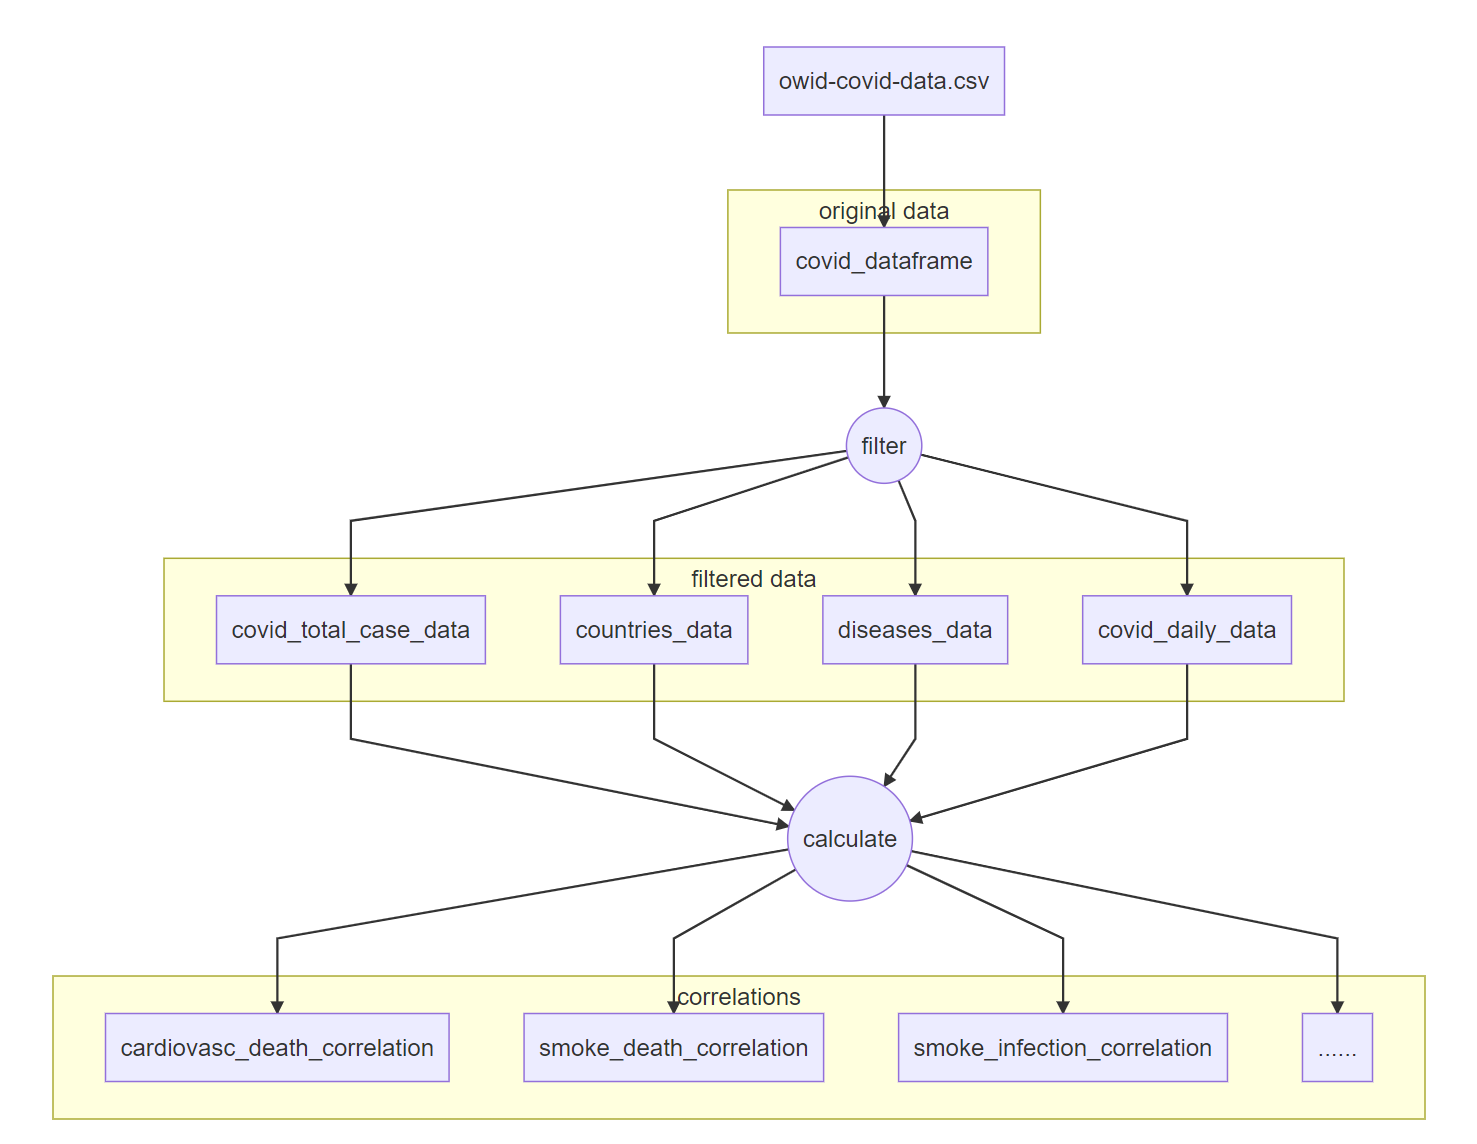

Secondly, for correlation of policies and infection rate, we used 2 original datasets, one contains statistic of COVID-19, another contains government measures(policies) data. The  main processes is similar to the first part above, just the sub-datasets are different. Similar analysis processes can make great use of the methods we have written before.

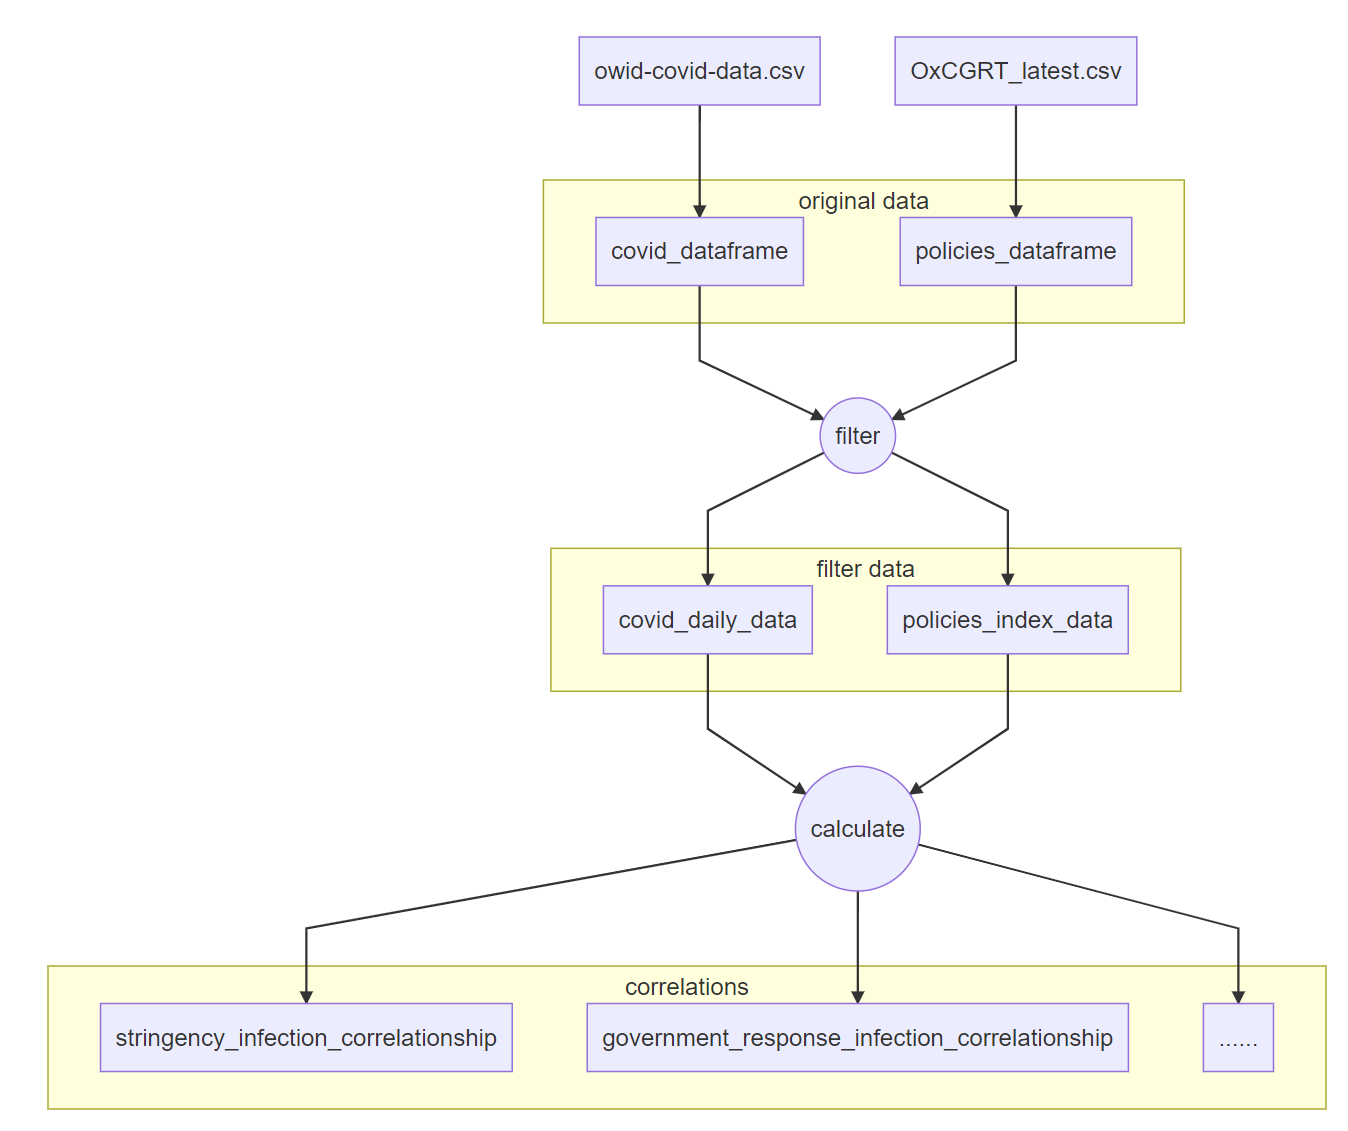

### Processing Modules and Algorithms

* Cleaning the data 
  * Null replacement or removing.
  * Excluding the irrelevant data which will not be used in project.
* Separate the data
  * Separate the data into several sub-dataset (DataFrame type in code), including COVID-19 total data and daily data, countries data, diseases data, policies data and so on.
  * Extract common data - basic country information as individual DataFrame.
* Analyse the relation among factors and COVID-19 cases
  * Further extract quite a lot pairs of relation DataFrame for visualisation.
  * Calculate the correlation about these relation DataFrame by pearson correlation algorithm.

* Visualisation
  * Visualise the data given by analysis  before by Pandas drawing interface

# Program Code
    
* Although you may be programming in a "pipeline" style, it is strongly suggested you use function definitions to organise your code. As well as being generally good programming practice, it will be helpful for easy and flexibily presentation of results visualisations later in the document. In the visualisation sections you will be able to produce images in a concise and flexible way by calling functions defined in the program code secion.

#### import modules

We use pandas as the main module to manipulate data.
Other modules are used as auxiliary tools in a few methods.

In [1]:
import pandas as pd

import math
import numpy as np
import re
import warnings
from datetime import timedelta as timedelta

#### methods to modify columns name

These methods are to deal with some original columns name which have incorrect format.

`non_underline()` in charge of replace space as '\_'.

`lower_case_name` is to set the format of column names, replace words beginning with uppercase with lowercase, and use\_ Connecting words 

`format_column_name` is the finially method calling the methods below, we just need to use this when we want to format column name

In [2]:
def non_underline(string):
    delete_head_str = re.sub(r'^(\w\d)_', "", string)
    new_name = delete_head_str.replace(" ", "_")
    return new_name

def lower_case_name(old_name):
    sub_name_list = []
    for index, char in enumerate(old_name):
        if char.isupper() and index != 0:
            sub_name_list.append("_")
        sub_name_list.append(char)
    return "".join(sub_name_list).lower()

def format_column_name(old_name):
    new_name = non_underline(old_name)
    new_name = lower_case_name(new_name)
    return new_name

In [3]:
# method test show
test_format_name = "C1_SchoolClosure"
test_format_name = format_column_name(test_format_name)
test_format_name

'school_closure'

#### Read csv file as dataframe
This method is to read csv file as dataframe.

We've done a lot here to format data, especially data type:

1. At first we process the columns name as unified format
2. Then change the `date` column as string type, because both 2 source file are with different format of `date`, we need to change this column as string type, then change it back to date type with unified date format
3. Change the date type back with unified date format


In [4]:
def read_csv_file_as_dataframe(file_path):
    data_frame = pd.read_csv(file_path, low_memory=False)
    # set all column names as lower
    data_frame.columns = data_frame.columns.map(lambda x: format_column_name(x))
    # set date columns as string type
    data_frame['date'] = data_frame['date'].astype('str')
    # change date to format date type
    data_frame['date'] = pd.to_datetime(data_frame['date'])
    data_frame = data_frame.fillna(0)
    return data_frame

In [5]:
# test method
test_covid_df = read_csv_file_as_dataframe("./owid-covid-data.csv")
test_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136687 entries, 0 to 136686
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    136687 non-null  object        
 1   continent                                   136687 non-null  object        
 2   location                                    136687 non-null  object        
 3   date                                        136687 non-null  datetime64[ns]
 4   total_cases                                 136687 non-null  float64       
 5   new_cases                                   136687 non-null  float64       
 6   new_cases_smoothed                          136687 non-null  float64       
 7   total_deaths                                136687 non-null  float64       
 8   new_deaths                                  136687 non-null  float64      

#### Filter daily case data from covid original dataframe
This method is to filter the data related to daily cases, including country information and daily new infection, death, test cases and so on.

Then we exclude the null value, any null value should be excluded because calculation later will use them. Null value might affect the results.

In [6]:
def filter_covid_daily_case_data(df_original_covid):
    df_covid_daily_filter = df_original_covid[[ \
        'iso_code', 'continent', 'location', 'date', \
        'new_cases', 'new_cases_per_million', \
        'new_deaths', 'new_deaths_per_million', \
        'new_tests', 'new_tests_per_thousand', \
        'positive_rate', \
        'new_vaccinations'

    ]]
    df_covid_daily_filter = df_covid_daily_filter.dropna(axis="index", how="any")
    return df_covid_daily_filter.dropna(axis='index', how='all')

In [7]:
# test methods
test_covid_daily_case_df = filter_covid_daily_case_data(test_covid_df)
test_covid_daily_case_df.head()

,iso_code,continent,location,date,new_cases,new_cases_per_million,new_deaths,new_deaths_per_million,new_tests,new_tests_per_thousand,positive_rate,new_vaccinations
0,AFG,Asia,Afghanistan,2020-02-24,5.0,0.126,0.0,0.0,0.0,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,2020-02-25,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,2020-02-26,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,2020-02-27,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,2020-02-28,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0


Such as the daily data filter method above, all methods in the following cells are used to filter the corresponding data.

`filter_covid_total_case_data()`: filter the total case data for each date.

`filter_covid_hospital_data()`: filter the columns corresponding hospital, like patients and icu_admissions.

`filter_countries_data()`: filter columns about country information, as example that population, old people rate, human_development_index and so forth.

`filter_diseases_data()`: filter data about diseases, including cardiovasc and cardiovasc. Because 'smoking' is also related to health, so we add it in this subset.

`filter_policies_index_data`: This filtering method need to filter the policies dataset instead of covid statistic dataframe. It extract some government measure index as content for calculation of correlation about policies indexes.

In [8]:
def filter_covid_total_case_data(df_original_covid):
    df_covid_total_filter = df_original_covid[[ \
        'iso_code', 'continent', 'location', 'date', \
        'total_cases', 'total_cases_per_million', \
        'total_deaths', 'total_deaths_per_million', \
        'total_tests', 'total_tests_per_thousand', \
        'positive_rate', \
        'total_vaccinations', 'total_vaccinations_per_hundred', \
        'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred'
    ]]
    return df_covid_total_filter.dropna(axis='index', how='all')


def filter_covid_hospital_data(df_orinal_covid):
    df_covid_hospital_filter = df_orinal_covid[[ \
        'iso_code', 'continent', 'location', 'date', \
        'icu_patients', 'icu_patients_per_million', \
        'weekly_icu_admissions', 'weekly_icu_admissions_per_million', \
        'hosp_patients', 'hosp_patients_per_million', \
        'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million'
    ]]
    return df_covid_hospital_filter.dropna(axis='index', how='all')


def filter_countries_data(df_original_covid):
    df_countries_information_filter = df_original_covid[[ \
        'iso_code', 'continent', 'location', 'date', \
        'population', 'aged_65_older', 'aged_70_older', \
        'population_density', 'gdp_per_capita', \
        'human_development_index', 'handwashing_facilities'
    ]]
    return df_countries_information_filter.dropna(axis='index', how='all')


def filter_diseases_data(df_original_covid):
    df_diseases_information_filter = df_original_covid[[ \
        'iso_code', 'continent', 'location', 'date', \
        'cardiovasc_death_rate', 'diabetes_prevalence', \
        'female_smokers', 'male_smokers'
    ]]
    return df_diseases_information_filter.dropna(axis='index', how='all')


def filter_policies_index_data(df_original_policies):
    df_index_filter = df_original_policies[[ \
        'country_name', 'country_code', 'region_name', 'date', \
        'stringency_index_for_display', 'stringency_legacy_index', \
        'government_response_index', 'containment_health_index', \
        'economic_support_index'
    ]]
    return df_index_filter.dropna(axis='index', how='all')

In [9]:
# All the methods have been test successfully, and will be used later in other methods.
# So we just pick one or two of this as the test demonstration.

test_covid_total_case_df = filter_covid_total_case_data(test_covid_df)
test_covid_total_case_df.head()

,iso_code,continent,location,date,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,total_tests,total_tests_per_thousand,positive_rate,total_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
0,AFG,Asia,Afghanistan,2020-02-24,5.0,0.126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Another test
test_diseases_df = filter_diseases_data(test_covid_df)
test_diseases_df.head()

,iso_code,continent,location,date,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers
0,AFG,Asia,Afghanistan,2020-02-24,597.029,9.59,0.0,0.0
1,AFG,Asia,Afghanistan,2020-02-25,597.029,9.59,0.0,0.0
2,AFG,Asia,Afghanistan,2020-02-26,597.029,9.59,0.0,0.0
3,AFG,Asia,Afghanistan,2020-02-27,597.029,9.59,0.0,0.0
4,AFG,Asia,Afghanistan,2020-02-28,597.029,9.59,0.0,0.0


#### Get single country data
This methods is in charge of intercept data of one country, we should give country iso code as parameter, the it return all data about this country.

It not only can be used to the original dataframe, but also is suit to any datafram such as the subset above.

In [11]:
def get_country_data(country_iso_code, original_dataframe):
    # add date as index
    country_data = original_dataframe.loc[original_dataframe['iso_code'] == country_iso_code]
    country_data.dropna(axis='index', how='all')
    return country_data

In [12]:
# test methods
test_get_country_data = get_country_data('CHN', test_diseases_df)
test_get_country_data.head()

,iso_code,continent,location,date,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers
25165,CHN,Asia,China,2020-01-22,261.899,9.74,1.9,48.4
25166,CHN,Asia,China,2020-01-23,261.899,9.74,1.9,48.4
25167,CHN,Asia,China,2020-01-24,261.899,9.74,1.9,48.4
25168,CHN,Asia,China,2020-01-25,261.899,9.74,1.9,48.4
25169,CHN,Asia,China,2020-01-26,261.899,9.74,1.9,48.4


#### Get country iso code and name as new DataFrame 

This methods is to get iso code, country name and continent as a single dataframe. 

It will be used when calculate the correlation about policies indexes later.

In [13]:
def get_basic_country_info(original_dateframe):
    country_info_df = original_dateframe.groupby('iso_code')
    country_info_df = country_info_df.first()[['location', 'continent']]
    country_info_df.rename(columns={'location': 'country_name'}, inplace=True)
    return country_info_df

In [14]:
# test method
get_basic_country_info(test_covid_df).head()

,country_name,continent
iso_code,,
ABW,Aruba,North America
AFG,Afghanistan,Asia
AGO,Angola,Africa
AIA,Anguilla,North America
ALB,Albania,Europe


#### Calculate all countries' correlation common method

We found that there many factors might be related to deaths or infections of COVID-19, and these factors can be anlysed via many methods. Fortunately, these method have many similar processes, so we extract these code as a common method.

It needs 4 parameters, x_name and x_dataframe are the first dataframe(x_dataframe) with the column(x_name) we want to analysis, y_name and y_dataframe as well.

In terms of the return, the return value is a tuple, including the final correlationship, and two compared columns as dataframe (the relation DataFrame mentioned above). We include the DataFrame for visualisation at last.

This method do not neet ot show the test because next, we have many mehtods to use it.

In [15]:
def countries_correlation_calculate(x_name, x_dataframe, y_name, y_dataframe):
    group_country_diseases = x_dataframe.groupby('iso_code')
    group_country_diabetes = group_country_diseases.agg({x_name: np.mean})

    group_country_total_case = y_dataframe.groupby('iso_code')
    group_country_death = group_country_total_case.agg({y_name: np.max})

    correlationship_df = pd.merge(group_country_diabetes, group_country_death, how='inner', on='iso_code')
    correlationship_df.dropna(axis="index", how="any", inplace=True)

    correlationship = correlationship_df[x_name].corr(correlationship_df[y_name])

    return (correlationship, correlationship_df)

#### Calculate correlation and the factor data about death case
There methods in next cell all call the previous method `countries_correlation_calculate` as thier process steps are highly similar. 
`cardiovasc_death_correlation()`: analysis the correlation between cardiovasc death rate and death case of COVID-19

`diabetes_death_correlation()`: analysis the correlation between diabetes rate and death case of COVID-19

`smoke_death_correlation()`: analysis the correlation between smoker rate and death case of COVID-19

`older_death_correlation()`: analysis the correlation between older people(65+) rate and death case of COVID-19

`human_development_death_correlation()`: analysis the correlation between human development index and death case of COVID-19

`diabetes_infection_correlation()`: analysis the correlation between diabetes rate and infection case of COVID-19

`population_infection_correlation()`: analysis the correlation between population density and infection case of COVID-19

`human_development_infection_correlation()`: analysis the correlation between human development index and infection case of COVID-19

`older_infection_correlation()`: analysis the correlation between older people(65+) rate and infection case of COVID-19

`handwashing_facilities_infection_correlation()`: analysis the correlation between handwashing facilities and infection case of COVID-19

In [16]:
def cardiovasc_death_correlation(diseases_dataframe, total_case_dataframe):
    return countries_correlation_calculate('cardiovasc_death_rate', diseases_dataframe, 'total_deaths_per_million',
                                           total_case_dataframe)

def diabetes_death_correlation(diseases_dataframe, total_case_dataframe):
    return countries_correlation_calculate('diabetes_prevalence', diseases_dataframe, 'total_deaths_per_million',
                                           total_case_dataframe)

def smoke_death_correlation(diseases_dataframe, total_case_dataframe):
    diseases_dataframe["total_smoker"] = diseases_dataframe["female_smokers"] + diseases_dataframe["male_smokers"]
    return countries_correlation_calculate('total_smoker', diseases_dataframe, 'total_deaths_per_million',
                                           total_case_dataframe)

def older_death_correlation(country_datafram, total_case_dataframe):
    return countries_correlation_calculate('aged_65_older', country_datafram, 'total_deaths_per_million',
                                           total_case_dataframe)

def human_development_death_correlation(country_datafram, total_case_dataframe):
    return countries_correlation_calculate('human_development_index', country_datafram, 'total_deaths_per_million',
                                           total_case_dataframe)

def diabetes_infection_correlation(diseases_dataframe, total_case_dataframe):
    return countries_correlation_calculate('diabetes_prevalence', diseases_dataframe, 'total_cases_per_million',
                                           total_case_dataframe)

def population_infection_correlation(country_datafram, total_case_dataframe):
    return countries_correlation_calculate('population_density', country_datafram, 'total_cases_per_million',
                                           total_case_dataframe)

def human_development_infection_correlation(country_datafram, total_case_dataframe):
    return countries_correlation_calculate('human_development_index', country_datafram, 'total_cases_per_million',
                                           total_case_dataframe)

def older_infection_correlation(country_datafram, total_case_dataframe):
    return countries_correlation_calculate('aged_65_older', country_datafram, 'total_cases_per_million',
                                           total_case_dataframe)

def handwashing_facilities_infection_correlation(country_datafram, total_case_dataframe):
    return countries_correlation_calculate('handwashing_facilities', country_datafram, 'total_cases_per_million',
                                           total_case_dataframe)

In [17]:
# test one of these methos as example
diabetes_death_correlation_result = diabetes_death_correlation(test_diseases_df, test_covid_total_case_df)
diabetes_death_correlation_result[1].head()

,diabetes_prevalence,total_deaths_per_million
iso_code,,
ABW,11.62,0.000
AFG,9.59,184.886
AGO,3.94,51.070
AIA,0.00,0.000
ALB,10.08,1076.252


#### Common method of correlation between policies index and infection rate

Just like `countries_correlation_calculate()` mentioned above, this method is also a common method provided to  many related mehtods.

It is to provide core algorithm for calculating correlation between various government policies index and infection rate, and other related methods can call this for avoiding duplicate code.

In [18]:
def index_case_correlation(country_iso_code, index_name, index_dataframe, daily_case_dataframe):
    index_dataframe = index_dataframe.loc[index_dataframe['country_code'] == country_iso_code][['date', index_name]]
    daily_case_dataframe = daily_case_dataframe.loc[daily_case_dataframe['iso_code'] == country_iso_code][
        ['date', 'new_cases_per_million']]

    merge_df = pd.merge(index_dataframe, daily_case_dataframe, how='inner', on='date')
    group_index_daily_case = merge_df.groupby(index_name)

    correlationship_df = group_index_daily_case.agg({'new_cases_per_million': np.min}).reset_index()
    correlationship_df.dropna(axis="index", how="any", inplace=True)

    correlationship = correlationship_df[index_name].corr(correlationship_df['new_cases_per_million'])

    return (correlationship, correlationship_df)

These are some methods calculating the different correlations about government policies index and infection cases.

`stringency_infection_correlation()`: analysis the correlation between stringency index and infection case of COVID-19

`government_response_infection_correlation()`: analysis the correlation between government response index and infection case of COVID-19

`health_response_infection_correlation()`: analysis the correlation between containment health index and infection case of COVID-19

`economic_support_infection_correlation()`: analysis the correlation between economic support index and infection case of COVID-19

In [19]:
def stringency_infection_correlation(country_iso_code, index_dataframe, daily_case_dataframe):
    return index_case_correlation(country_iso_code, 'stringency_index_for_display', index_dataframe,
                                  daily_case_dataframe)


def government_response_infection_correlation(country_iso_code, index_dataframe, daily_case_dataframe):
    return index_case_correlation(country_iso_code, 'government_response_index', index_dataframe,
                                  daily_case_dataframe)


def health_response_infection_correlation(country_iso_code, index_dataframe, daily_case_dataframe):
    return index_case_correlation(country_iso_code, 'containment_health_index', index_dataframe,
                                  daily_case_dataframe)


def economic_support_infection_correlation(country_iso_code, index_dataframe, daily_case_dataframe):
    return index_case_correlation(country_iso_code, 'economic_support_index', index_dataframe, daily_case_dataframe)

#### Finally calculate method
This method call and execute the previously defined methods to get all the correlation and factors dataframes which we want. 

These methods all return a python dictionary which includes all correlation within all countries.

`death_correlations()`: get all correlations about various factors compared with total death rate of COVID-19, and factors dataframes as the dictionary.

`infection_correlations()`: get all correlations about various factors compared with total infection rate of COVID-19, and factors dataframes as the dictionary.

In [20]:
def death_correlations(covid_dataframe):
    # filter data
    covid_total_case_data = filter_covid_total_case_data(covid_dataframe)
    countries_data = filter_countries_data(covid_dataframe)
    diseases_data = filter_diseases_data(covid_dataframe)

    # correlationship about death
    cardiovasc_death_correlation_result = cardiovasc_death_correlation(diseases_data, covid_total_case_data)
    diabetes_death_correlation_result = diabetes_death_correlation(diseases_data, covid_total_case_data)
    smoke_death_correlation_result = smoke_death_correlation(diseases_data, covid_total_case_data)
    older_death_correlation_result = older_death_correlation(countries_data, covid_total_case_data)
    human_development_death_correlation_result = human_development_death_correlation(countries_data,
                                                                                     covid_total_case_data)
    correlations_death_dict = {}
    correlations_death_dict['cardiovasc_death_correlation'] = cardiovasc_death_correlation_result
    correlations_death_dict['diabetes_death_correlation'] = diabetes_death_correlation_result
    correlations_death_dict['smoke_death_correlation'] = smoke_death_correlation_result
    correlations_death_dict['older_death_correlation'] = older_death_correlation_result
    correlations_death_dict['human_development_death_correlation'] = human_development_death_correlation_result

    return correlations_death_dict


def infection_correlations(covid_dataframe):
    # filter data
    covid_total_case_data = filter_covid_total_case_data(covid_dataframe)
    countries_data = filter_countries_data(covid_dataframe)
    diseases_data = filter_diseases_data(covid_dataframe)

    # correlationship about infection
    diabetes_infection_correlation_result = diabetes_infection_correlation(diseases_data, covid_total_case_data)
    population_infection_correlation_result = population_infection_correlation(countries_data, covid_total_case_data)
    older_infection_correlation_result = older_infection_correlation(countries_data, covid_total_case_data)
    human_development_infection_correlation_result = human_development_infection_correlation(countries_data,
                                                                                               covid_total_case_data)
    handwashing_facilities_infection_correlation_result = handwashing_facilities_infection_correlation(countries_data,
                                                                                                       covid_total_case_data)

    correlations_infection_dict = {}
    correlations_infection_dict['diabetes_infection_correlation'] = diabetes_infection_correlation_result
    correlations_infection_dict['population_infection_correlation'] = population_infection_correlation_result
    correlations_infection_dict['older_infection_correlation'] = older_infection_correlation_result
    correlations_infection_dict['human_development_infection_correlation'] = human_development_infection_correlation_result
    correlations_infection_dict[
        'handwashing_facilities_infection_correlation'] = handwashing_facilities_infection_correlation_result

    return correlations_infection_dict

#### Get correlation of policies index and infection rate about one country
This method is to call and execute previous methods to calculate the correlation of 4 index and injection rate within a dictionary of one country

In [21]:
def policies_infection_correlations(country_iso_code, covid_dataframe, policies_dataframe):
    # filter data
    covid_daily_data = filter_covid_daily_case_data(covid_dataframe)
    policies_index_data = filter_policies_index_data(policies_dataframe)

    # policies effect
    stringency_infection_correlation_result = stringency_infection_correlation(country_iso_code, policies_index_data,
                                                                                   covid_daily_data)[0]
    government_response_infection_correlation_result = government_response_infection_correlation(country_iso_code,
                                                                                                     policies_index_data,
                                                                                                     covid_daily_data)[0]
    health_response_infection_correlation_result = health_response_infection_correlation(country_iso_code, policies_index_data,
                                                                                             covid_daily_data)[0]
    economic_support_infection_correlation_result = economic_support_infection_correlation(country_iso_code, policies_index_data,
                                                                                               covid_daily_data)[0]

    correlations_infection_country_dict = {}
    correlations_infection_country_dict['stringency_infection_correlation'] = stringency_infection_correlation_result
    correlations_infection_country_dict[
        'government_response_infection_correlation'] = government_response_infection_correlation_result
    correlations_infection_country_dict[
        'health_response_infection_correlation'] = health_response_infection_correlation_result
    correlations_infection_country_dict[
        'economic_support_infection_correlation'] = economic_support_infection_correlation_result

    return correlations_infection_country_dict

#### Get correlation of policies index and infection rate about one country

`all_countries_policies_infection_correlation()`: get all correlation about government measures index and infection rate for each country. The result also collect by an dictionary.

As the result, we find there are many NaN value after calculating, so we further filter and exclude the NaN value, and finally reutrn the processed dataset as a dictionary.

In [22]:
def all_countries_policies_infection_correlation(countries_infomation, covid_dataframe, policies_dataframe):
    countries_policies_correlation_dict = {}
    for country in countries_infomation.itertuples():
        result = policies_infection_correlations(country[0], covid_dataframe, policies_dataframe)
        countries_policies_correlation_dict[country[0]] = result

    # deal with NaN value
    pop_list = []
    for country_code, corr_dict in countries_policies_correlation_dict.items():
        for value in corr_dict.values():
            if math.isnan(value):
                pop_list.append(country_code)
                break

    for pop_name in pop_list:
        countries_policies_correlation_dict.pop(pop_name)

    return countries_policies_correlation_dict

We have to mention that in this method, many of NaN value would generate. So we deal with NaN value agian after calculation.

NaN value will influence the sort and ranking result later, so we should try to avoid it.

#### Sort correlation about policies indexes

Due to the need of ranking of countries about each correlation of on of the policies indexes, we need sort the result we get from `policies_infection_correlations`, as purpose for visualisation.

It return a list including the sorted data.

In [23]:
def sort_policies_result_dict(corr_name, result_dict):
    result_dict_sort_list = sorted(result_dict.items(), key=lambda cor: abs(cor[1][corr_name]), reverse=True)
    return result_dict_sort_list

#### The Final Step: Read datasets and calculate result set
This cell with code is the final step to execute our core algorithm. After execution, we can gain almost result data we want, and the result can easy to be used for visualisation.

One thing need to be notice, because the NaN value and huge amount of calculation. There might be some warning information during the execution. So we ignore the warning information in result output. Do not worry, the calculation result will not be effect by NaN value as we have done our best to filter null and NaN values after every step.

In [24]:
# ignore the warning information
warnings.filterwarnings("ignore")

# read the sources file as DataFrame
covid_dataframe = read_csv_file_as_dataframe(r"./owid-covid-data.csv")
#  this step is to filter the data not related to every conutry
covid_dataframe = covid_dataframe.loc[lambda df: (df['iso_code'].str.len() == 3), :]
policies_dataframe = read_csv_file_as_dataframe(r"./OxCGRT_latest.csv")

# get the countries information for correlation calculation
countries_infomation = get_basic_country_info(covid_dataframe)

# get the final data filter and manipulation result sets.
correlations_death_dict = death_correlations(covid_dataframe)
correlations_infection_dict = infection_correlations(covid_dataframe)
correlations_infection_country_dict = all_countries_policies_infection_correlation(countries_infomation, covid_dataframe, policies_dataframe)

After execute the cell above, we have get all the result set, even for ranking and vasualisation. Then we can just use these result dataset and some methods definited before, to further analysis and visualisation.

# Project Outcome

## Overview of Results

At first, we finished filtering a large amount of data. We filtered the data from nearly 300000 entries of data, divided the data into several main subsets, and deal with null value processing. At the end of Object 1, we completed the data filtering functions of total case dataset, daily case dataset, diseases dataset and country information dataset.

Secondly, in objective 2, we further analysed the data and obtained the comparative dataframe of various potential factors and COVID-19 death and infection rate from World Health Organisation COVID-19 dataset to provide subsequent vidualisation analysis. As the result, we found there are many factors related to COVID-19 situation, such as old people rate, smoker rate, human development index and so on.

In addition, we introduced a new dataset to analyse the impact of national policies on their infection rate, and rank and visually analyse the results. At last we have gained which countries should pay more attention on which measures or policies.

**By the way, because the units of each data(column) are different or the value gap is too large, we further process the data in the charts (expansion multiple), which does not affect our result evaluation, but just to get the correlation between the data through the charts more intuitively** 

## Objective 1

### Explanation of Results

It is worth mentioning that object 1 is just an intermediate result. It only filters the data we need, and then divides the data column into different groups according to the category for later use.

Beside this, we use the intermediate dataset to make a visual display. We show the number of infections and death count of COVID-19 in each country through a histogram. Of course, we only show the 10 countries with the highest number of deaths. Through this chart, we found that although there are more cases in some countries, their number of death is relatively lower, which shows that although there is a certain relation between the number of deaths and the infection cases, the impact of human factors on the COVID-19 can not be ignored.

As the result, we need to further analyse various potential relevant factors with death or infection cases.

### Visualisation
The following bar chart illustrates the figure for the total number of cases and deaths respectively. In this chart, we ranked the sort by death cases.

<AxesSubplot:xlabel='location'>

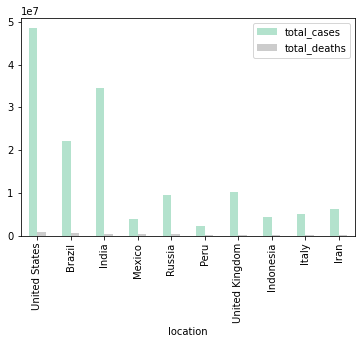

In [25]:
covid_dataframe = covid_dataframe.fillna(0)
total_df = covid_dataframe.groupby('iso_code').last()
total_df = total_df[['location', 'total_cases', 'total_deaths']]
total_df.sort_values(by='total_deaths', inplace=True, ascending=False)
total_df.head(10).plot.bar('location', ['total_cases', 'total_deaths'], colormap='Pastel2', fontsize=10)

However, we can see the infection statistic are not very relevant, so we guess there must be other factors affecting the infection and death cases.

And the analysis in deep can be seen at next section (object 2).

## Objective 2
### Explanation of Results
As we often learned in the news or social media that the elderly are more likely to be infected with COVID-19. Therefore, we took this opportunity to explore the relationship between the number of elderly over 65 years old, the death rate and infection rate by using relevant technologies.

According to the analysis results, we find that the death rate and infection rate are indeed higher in countries with population aging. In other words, the elderly are more vulnerable to the influence of COVID-19.

### Visualisation
The following line chart vividly shows the figure for population aging, infection cases and deaths rate, which sorted by people aged 65+. Abscissa is the country code of several countries. One thing to note, 

Although the data fluctuate, while in overall, the greater the proportion of the elderly over 65, the higher the cases and death rate.

<AxesSubplot:title={'center':'older_death'}, xlabel='iso_code'>

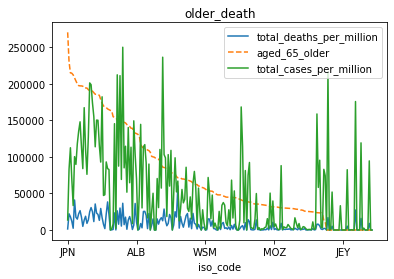

In [26]:
older_death_df = correlations_death_dict['older_death_correlation'][1]

total_deaths_df = older_death_df['total_deaths_per_million']
older_infection_df = correlations_infection_dict['older_infection_correlation'][1]
total_merge_df = pd.merge(total_deaths_df, older_infection_df, how='right', on='iso_code')

total_merge_df['aged_65_older'] = total_merge_df['aged_65_older'] * 10000
total_merge_df['total_deaths_per_million'] = total_merge_df['total_deaths_per_million'] * 10

total_merge_df.sort_values(by="aged_65_older",inplace=True, ascending=False)
total_merge_df.plot(style=['-','--', '-'], title='older_death', fontsize=10)

### Explanation of Results
In addition, we take into account the impact of the level of social development on the defense of the COVID-19, which is represented by the human development index.

Initially, we speculated that countries with higher levels of social development would have lower cases, because they held better medical equipment and technology. However, the results illustrate that countries or regions with greater human development index are usually accompanied by higher cases and death rate, which surprises us a lot.

We thought about the reasons for this, on the one hand, countries with low index may have some data that are not involved in statistics, because some countries are limited by government factors or technical level, resulting in the lack of data. On the other hand, countries with higher development levels perhaps have more international links and more developed transportation, so people flow more and have more opportunities to be exposed to the virus.

### Visualisation
As we can clearly see in the following line chart that the number of cases and deaths get less with the decrease of the human development index.

<AxesSubplot:title={'center':'people_development_infection'}, xlabel='iso_code'>

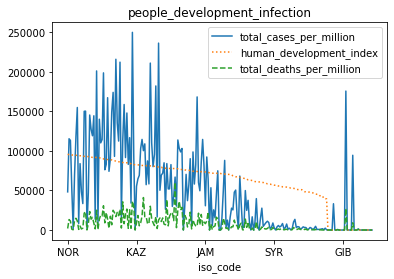

In [27]:
human_development_infection_df = correlations_infection_dict['human_development_infection_correlation'][1]

human_development_df = human_development_infection_df['total_cases_per_million']
human_development_death_df = correlations_death_dict['human_development_death_correlation'][1]
total_merge_df = pd.merge(human_development_df, human_development_death_df, how='right', on='iso_code')

total_merge_df['human_development_index'] = total_merge_df['human_development_index'] * 100000
total_merge_df['total_deaths_per_million'] = total_merge_df['total_deaths_per_million'] * 10

total_merge_df.sort_values(by='human_development_index', inplace=True, ascending=False)
total_merge_df.plot(style=['-', ':', '--'], title='people_development_infection', fontsize=10)

### Explanation of Results
As we all know, smoking is harmful to health, especially to the lung, which may lead to death from lung cancer. At same time, the COVID-19 is also a kind of pneumonia, which also affects the lung. On this basis, we speculate that there is a certain link between smoking and new crown mortality, then we analyze it with other two diseases, cardiovascular disease and diabetes at the same time.

As a rusult, we studied the relationship between cardiovascular disease, diabetes mellitus, smoking and the deaths rate. According to the data from the analysis, smoking does have an impact on the COVID-19. Specifically, the deaths rate increases with the greater number of smoking population.

### Visualisation
It can be seen in the following area chart that the association between COVID-19, cardiovascular and diabetes diseases is relatively low, while smoking has a certain effect on it.

<AxesSubplot:xlabel='iso_code'>

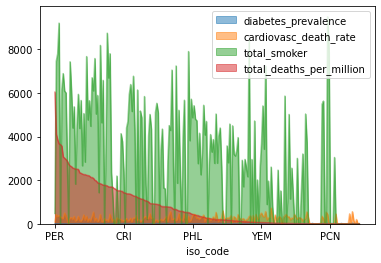

In [28]:
cardiovasc_death_df = correlations_death_dict['cardiovasc_death_correlation'][1]
cardiovasc_death_df = cardiovasc_death_df['cardiovasc_death_rate']
diabetes_death_df = correlations_death_dict['diabetes_death_correlation'][1]
diabetes_death_df = diabetes_death_df['diabetes_prevalence']
smoke_death_df = correlations_death_dict['smoke_death_correlation'][1]

smoke_death_df = pd.merge(cardiovasc_death_df, smoke_death_df, how='right', on='iso_code')
smoke_death_df = pd.merge(diabetes_death_df, smoke_death_df, how='right', on='iso_code')
smoke_death_df['total_smoker'] = smoke_death_df['total_smoker'] * 100

smoke_death_df.sort_values(by="total_deaths_per_million", inplace=True, ascending=False)
smoke_death_df.plot.area(stacked=False)

## Objective 3
### Explanation of Results
In order to further explore the correlation between these possible factors and COVID-19, we introduced Pearson Correlation Coefficient. Then we calculated the correlation of death and infection respectively with the five factors most likely to be related to them. 

Among them, there is a great relationship between the mortality, infection and the human development index(the correlation coefficients are about 0.66 and 0.50 respectively), and there is also a certain correlation between aging and these two ratios (the correlation coefficients are 0.60 and 0.54 respectively).

Apart from that, we also realized that the correlation coefficient of cardiovascular diseases, diabetes and COVID-19 mortality is very low (only -0.12 and 0.06 respectively), which means there is little link between them. Nevertheless, the value of smoking is 0.47, which means that what we conluded in the previous analysis in Objective 2 was totally correct.

### Visualisation
The following two bar charts illustrate the figure for the total number of cases and deaths respectively.

<AxesSubplot:title={'center':'correlation_death'}, xlabel='correlation_death_name_list'>

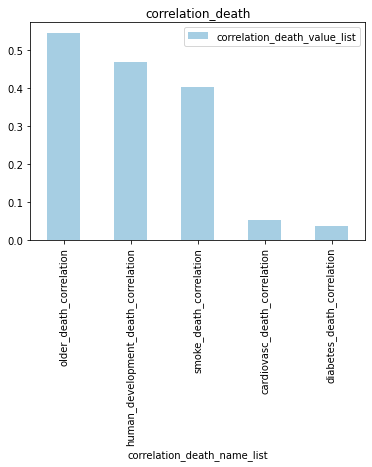

In [29]:
correlation_death_name_list = []
correlation_death_value_list = []

for name, df in correlations_death_dict.items() :
    correlation_death_name_list.append(name)
    correlation_death_value_list.append(df[0])

correlation_death = {"correlation_death_name_list": correlation_death_name_list,
               "correlation_death_value_list": correlation_death_value_list}

correlation_death_df = pd.DataFrame(correlation_death)
correlation_death_df.sort_values(by="correlation_death_value_list", inplace=True, ascending=False)
# sns.barplot(x="correlation_death_name_list", y="correlation_death_value_list", data=correlation_death_df)
correlation_death_df.plot.bar('correlation_death_name_list', 'correlation_death_value_list', colormap='Paired', title='correlation_death', fontsize=10)

<AxesSubplot:title={'center':'correlation_infection'}, xlabel='correlation_infection_name_list'>

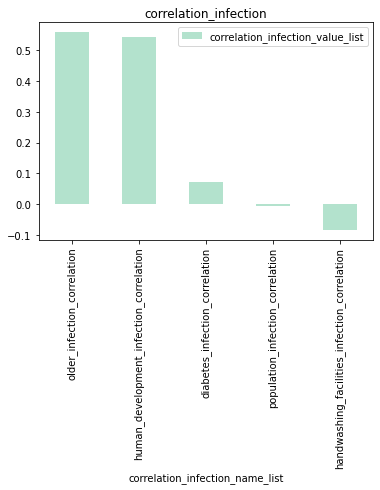

In [30]:
correlation_infection_name_list = []
correlation_infection_value_list = []

for name, df in correlations_infection_dict.items() :
    correlation_infection_name_list.append(name)
    correlation_infection_value_list.append(df[0])

correlation_infection = {"correlation_infection_name_list": correlation_infection_name_list,
               "correlation_infection_value_list": correlation_infection_value_list}

correlation_infection_df = pd.DataFrame(correlation_infection)
correlation_infection_df.sort_values(by="correlation_infection_value_list", inplace=True, ascending=False)
correlation_infection_df.plot.bar('correlation_infection_name_list', 'correlation_infection_value_list', colormap='Pastel2', title='correlation_infection', fontsize=10)

### Explanation of Results
However, we also noticed that these factors do not close to 1, although they have a certain correlation. In fact, it is reasonable, because the COVID-19 can not be controlled by only one factor, which also shows that the influence of human factors can not be ignored.

Therefore, we went on exploring the impact of national policies on the COVID-19, which is easy to forget to be taken into consideration, including the stringency of the policy, government response speed, health containment and economic support.

Similarly, we still judge the correlation between these factors and COVID-19 by the value of correlation coefficients. According to the calculation results and these visual graphics, we can see that these 4 factors are closely related to the COVID-19, although some are positively correlated and the others are negatively correlated.

We also noticed that the correlation coefficient between the economic support of four countries and the COVID-19 is almost or has reached 1, which is very unscientific. We guessed this is caused by abnormal data, because some data has been lost when we collect data. There is no doubt that we need to deal with these missing values, but it is not possible for us to deal with them extremely perfectly. If we delete all these countries directly, the data will not be objective enough, while if we fill all the missing values as 0, it must have an impact on relevant calculations.

### Visualisation
We can clearly see that the 4 following bar charts illustrates the figure for the 10 countries with the highest correlation with these 4 factors respectively.

<AxesSubplot:title={'center':'stringency_infection_correlation'}, xlabel='country_list'>

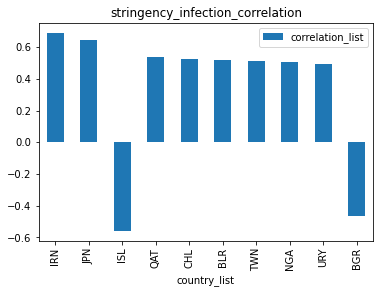

In [31]:
stringency_infection = sort_policies_result_dict("stringency_infection_correlation", correlations_infection_country_dict)

country_list = []
correlation_list = []

for name, value in stringency_infection:
    country_list.append(name)
    correlation_list.append(value['stringency_infection_correlation'])

policy_correlation = {"country_list": country_list,
               "correlation_list": correlation_list}

policy_correlation_df = pd.DataFrame(policy_correlation)
policy_correlation_df.head(10).plot.bar('country_list', 'correlation_list', title='stringency_infection_correlation', fontsize=10)

<AxesSubplot:title={'center':'government_response_infection_correlation'}, xlabel='country_list'>

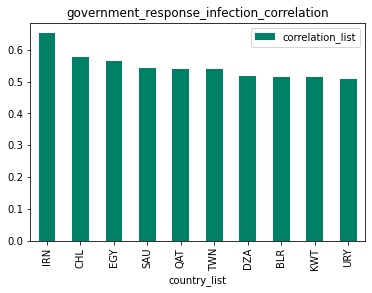

In [32]:
government_response_infection = sort_policies_result_dict("government_response_infection_correlation", correlations_infection_country_dict)

country_list = []
correlation_list = []

for name, value in government_response_infection:
    country_list.append(name)
    correlation_list.append(value['government_response_infection_correlation'])

policy_correlation = {"country_list": country_list,
               "correlation_list": correlation_list}

policy_correlation_df = pd.DataFrame(policy_correlation)
policy_correlation_df.head(10).plot.bar('country_list', 'correlation_list', colormap='summer', title='government_response_infection_correlation', fontsize=10)

<AxesSubplot:title={'center':'health_response_infection_correlation'}, xlabel='country_list'>

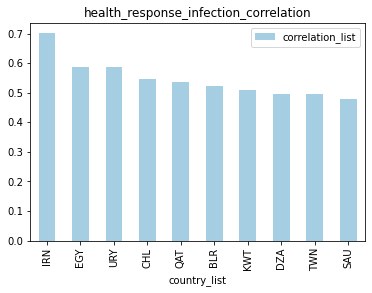

In [33]:
health_response_infection = sort_policies_result_dict("health_response_infection_correlation", correlations_infection_country_dict)

country_list = []
correlation_list = []

for name, value in health_response_infection:
    country_list.append(name)
    correlation_list.append(value['health_response_infection_correlation'])

policy_correlation = {"country_list": country_list,
               "correlation_list": correlation_list}

policy_correlation_df = pd.DataFrame(policy_correlation)
policy_correlation_df.head(10).plot.bar('country_list', 'correlation_list', colormap='Paired', title='health_response_infection_correlation', fontsize=10)

<AxesSubplot:title={'center':'economic_support_infection_correlation'}, xlabel='country_list'>

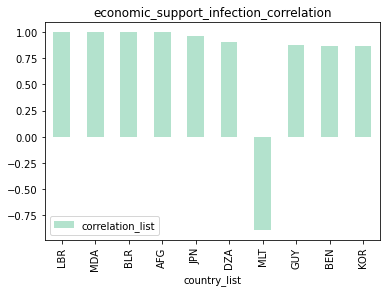

In [34]:
economic_support_infection = sort_policies_result_dict("economic_support_infection_correlation", correlations_infection_country_dict)

country_list = []
correlation_list = []

for name, value in economic_support_infection:
    country_list.append(name)
    correlation_list.append(value['economic_support_infection_correlation'])

policy_correlation = {"country_list": country_list,
               "correlation_list": correlation_list}

policy_correlation_df = pd.DataFrame(policy_correlation)
policy_correlation_df.head(10).plot.bar('country_list', 'correlation_list', colormap='Pastel2', title='economic_support_infection_correlation', fontsize=10)

# Conclusion

### Achievements

As we expected, many factors have correlation with COVID-19 situation, such as population density, old people rate, smoker rate and so forth. Some government measures also have high correlation with infection rate. However, there is a negative correlation between human development index and infection and death rate. We conjecture that this is beacuse the ergodic traffic and higher internationalisation in developed countries. Besides, we found the correlation between economy support index and infection rate is too high, so we suspect that there is a problem with this part of the data, or our analysis algorithm needs to be further improved.


### Limitations

The project should be based on real and comprehensive data, but data provider would inevitably make mistakes in daily statistics, not to mention such a huge data set, so there must be some limitations.

For example, there are some missing values in the current datasets. Although we have dealt with all of the values of NaN, we can't guarantee that it will not have any impact on any of figures.

In addition, some countries or regions may be limited by medical equipment and technology. Therefore, some patients would not be counted as ones in the calculation, which results in data loss.

Last, some method need to further optimization, to handle some special values.

### Future Work
In fact, our work did not meet the perfect expectations. On this basis, we can carry out the next step of development, such as:

* Add more analysis about potential factors.
* Develop the export interface of each sub data set to provide the filtered data set to others.
* Import the dataset and result set into the database as the background data of a website or app, and automatically update the latest data from the data provider every day.
* Predict the future data through data modeling and reasoning.

In the future, we do hope to obtain more comprehensive and diverse data so that we can conduct more accurate analysis. At the same time, we also would like to explore more factors that may be related to the COVID-19, which may make human research on it more in-depth.